In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.max_columns',20)

In [3]:
df = pd.read_csv('D:\\Data Science\\Datasets\\Machine Learning\\02_Medical_Cost_Personal_Datasets.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

age


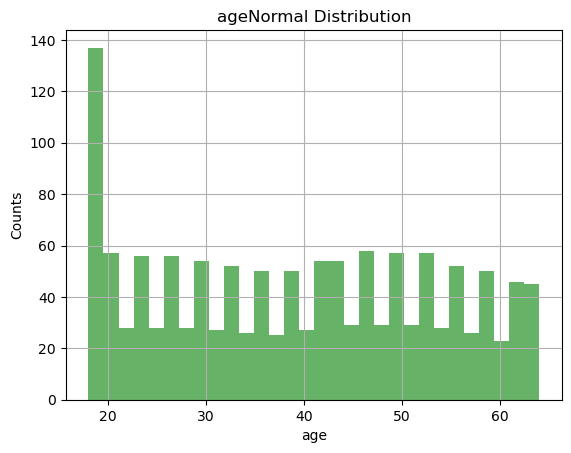

sex


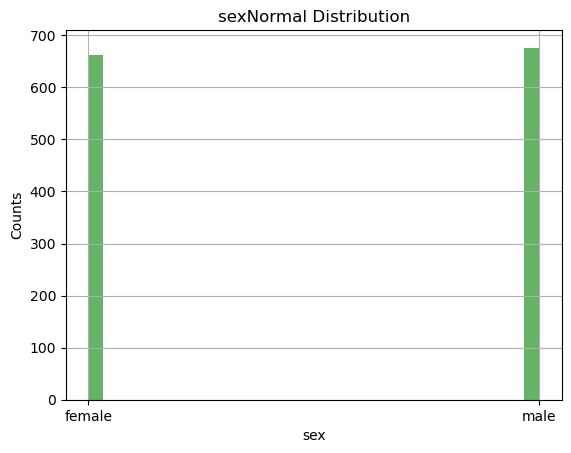

bmi


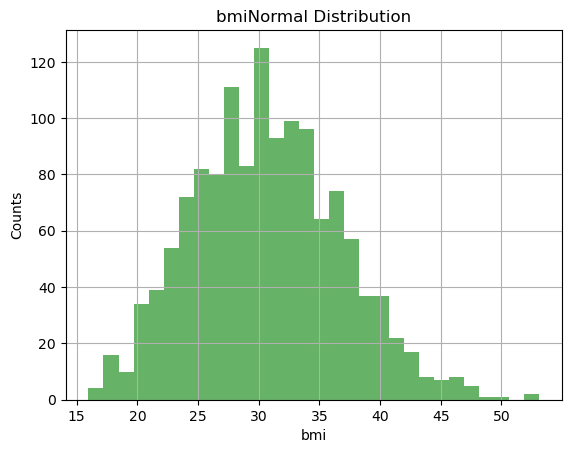

children


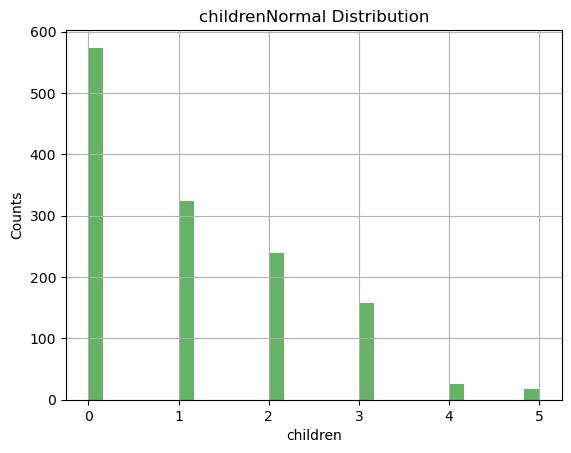

smoker


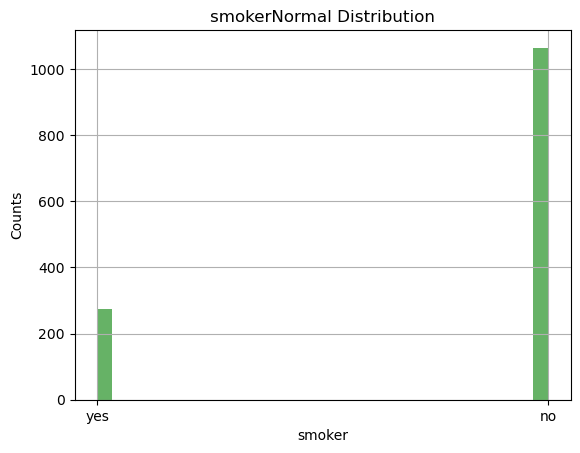

region


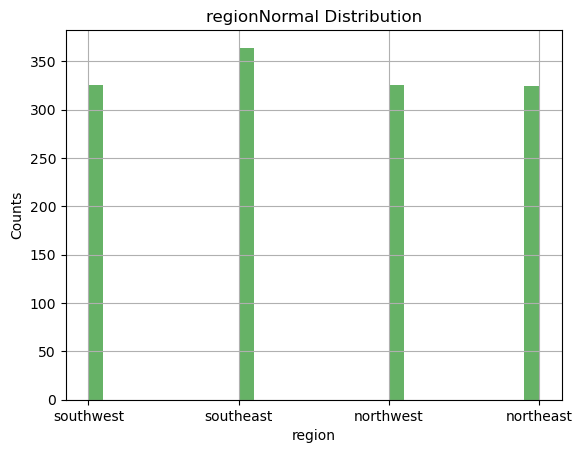

charges


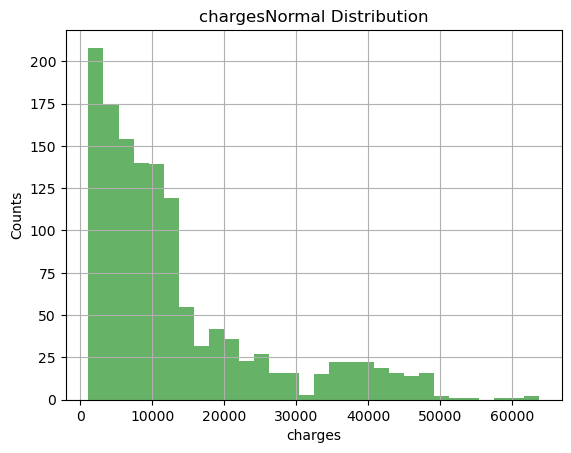

In [6]:
col = df.columns

for i in df.columns:
    print(i)
    # Create the plot
    plt.hist(df[i], bins=30, density=False, alpha=0.6, color='g')
    plt.title(i + 'Normal Distribution')
    plt.xlabel(i)
    plt.ylabel('Counts')
    plt.grid(True)

    # Show the plot
    plt.show()

In [7]:
dummies = pd.get_dummies(df.region)
dummies.head()

,northeast,northwest,southeast,southwest
0,False,False,False,True
1,False,False,True,False
2,False,False,True,False
3,False,True,False,False
4,False,True,False,False


In [8]:
df1 = pd.concat([df,dummies.drop('southwest', axis='columns')], axis='columns')
df1.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast
0,19,female,27.900,0,yes,southwest,16884.92400,False,False,False
1,18,male,33.770,1,no,southeast,1725.55230,False,False,True
2,28,male,33.000,3,no,southeast,4449.46200,False,False,True
3,33,male,22.705,0,no,northwest,21984.47061,False,True,False
4,32,male,28.880,0,no,northwest,3866.85520,False,True,False


In [9]:
df1.drop('region', axis = 1, inplace=True)
df1.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast
0,19,female,27.900,0,yes,16884.92400,False,False,False
1,18,male,33.770,1,no,1725.55230,False,False,True
2,28,male,33.000,3,no,4449.46200,False,False,True
3,33,male,22.705,0,no,21984.47061,False,True,False
4,32,male,28.880,0,no,3866.85520,False,True,False


In [10]:
dummies = pd.get_dummies(df.sex)
dummies.head()

,female,male
0,True,False
1,False,True
2,False,True
3,False,True
4,False,True


In [11]:
df2 = pd.concat([df1,dummies.drop('male', axis='columns')], axis='columns')
df2.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,female
0,19,female,27.900,0,yes,16884.92400,False,False,False,True
1,18,male,33.770,1,no,1725.55230,False,False,True,False
2,28,male,33.000,3,no,4449.46200,False,False,True,False
3,33,male,22.705,0,no,21984.47061,False,True,False,False
4,32,male,28.880,0,no,3866.85520,False,True,False,False


In [12]:
dummies = pd.get_dummies(df.smoker)
dummies.head()

,no,yes
0,False,True
1,True,False
2,True,False
3,True,False
4,True,False


In [13]:
df3 = pd.concat([df1,dummies.drop('yes', axis='columns')], axis='columns')
df3.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,no
0,19,female,27.900,0,yes,16884.92400,False,False,False,False
1,18,male,33.770,1,no,1725.55230,False,False,True,True
2,28,male,33.000,3,no,4449.46200,False,False,True,True
3,33,male,22.705,0,no,21984.47061,False,True,False,True
4,32,male,28.880,0,no,3866.85520,False,True,False,True


In [14]:
X = df3.drop(['charges', 'sex','smoker'], axis = 1)
X.head()

,age,bmi,children,northeast,northwest,southeast,no
0,19,27.900,0,False,False,False,False
1,18,33.770,1,False,False,True,True
2,28,33.000,3,False,False,True,True
3,33,22.705,0,False,True,False,True
4,32,28.880,0,False,True,False,True


In [15]:
y = df3['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
len(X_train), len(X_test)

(1070, 268)

In [18]:
len(y_train), len(y_test)

(1070, 268)

In [19]:
le = LinearRegression()

In [20]:
le.fit(X_train, y_train)

LinearRegression()

In [21]:
le.score(X_test, y_test)

0.8221233850508042

In [22]:
X_test.head()

,age,bmi,children,northeast,northwest,southeast,no
833,58,34.390,0,False,True,False,True
742,53,34.105,0,True,False,False,False
273,50,27.455,1,True,False,False,True
852,46,35.530,0,True,False,False,False
755,31,27.645,2,True,False,False,True


In [23]:
le.predict([[24,25,0,0,0,0,1]])

C:\Users\Ajith\anaconda3\envs\geo_env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2047.04326805])

In [24]:
from sklearn.ensemble import RandomForestRegressor
svr = RandomForestRegressor(n_estimators=150)

In [25]:
svr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

In [26]:
svr.score(X_test, y_test)

0.9029111504025826

In [27]:
svr.predict([[24,25,0,0,0,0,1]])

C:\Users\Ajith\anaconda3\envs\geo_env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3733.47797253])

In [28]:
y_test.head()

833    11743.93410
742    43254.41795
273     9617.66245
852    42111.66470
755     5031.26955
Name: charges, dtype: float64